# 数据可视化

## 1、通过Seaborn来绘图

In [17]:
import seaborn as sns

# 加载数据集,sns加载的数据集是dataframe类型
flights_long = sns.load_dataset("flights")
flights_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


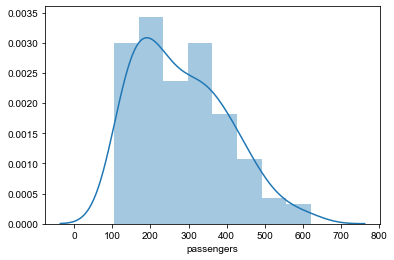

In [18]:
# 直方图（数值型）
# kde:用于控制密度曲线的有无(默认True)
sns.distplot(flights_long['passengers'], kde=True)

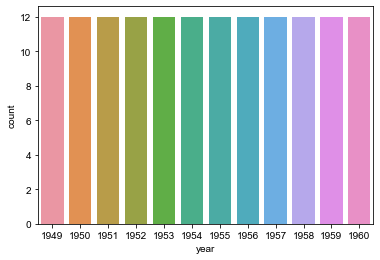

In [19]:
# 统计直方图

sns.countplot(flights_long['year'])

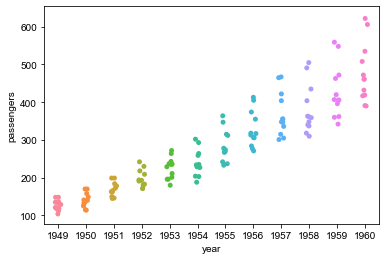

In [20]:
# 散点图

sns.stripplot(x='year', y='passengers', data=flights_long)

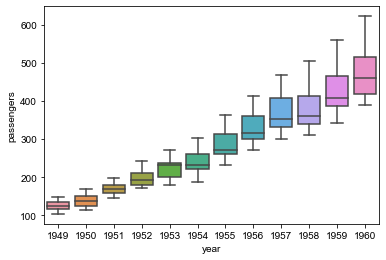

In [21]:
# 箱线图

sns.boxplot(x='year', y='passengers', data=flights_long)

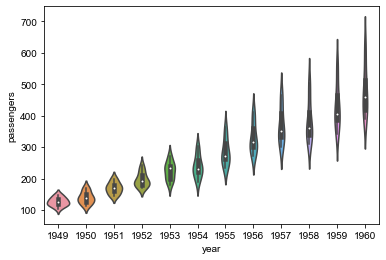

In [22]:
# 小提琴图

sns.violinplot(x='year', y='passengers', data=flights_long)

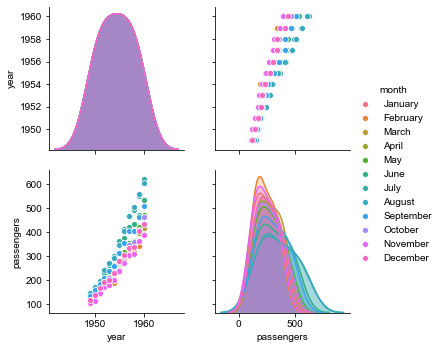

In [23]:
# 组合图

sns.pairplot(flights_long, hue='month')

## 2、通过altair来绘图

In [24]:
import altair as alt
# 加载可离线访问的数据集
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower',
             'Miles_per_Gallon']).interactive()

alt.Chart(...)

In [25]:
import altair as alt
from vega_datasets import data

source = data.barley()

bars = alt.Chart(source).mark_bar().encode(x=alt.X('sum(yield):Q',
                                                   stack='zero'),
                                           y=alt.Y('variety:N'),
                                           color=alt.Color('site'))

text = alt.Chart(source).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('sum(yield):Q', stack='zero'),
    y=alt.Y('variety:N'),
    detail='site:N',
    text=alt.Text('sum(yield):Q', format='.1f'))

bars + text

alt.LayerChart(...)

In [26]:
import altair as alt
from vega_datasets import data

source = data.stocks()

alt.Chart(source).mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)


alt.Chart(...)

In [27]:
import altair as alt
from vega_datasets import data

source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
          axis=alt.Axis(format='%Y', domain=False, tickSize=0)),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
              scale=alt.Scale(scheme='category20b'))).interactive()

alt.Chart(...)

In [28]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

# Generating Data
source = pd.DataFrame({
    'Trial A': np.random.normal(0, 0.8, 1000),
    'Trial B': np.random.normal(-2, 1, 1000),
    'Trial C': np.random.normal(3, 2, 1000)
})

alt.Chart(source).transform_fold(
    ['Trial A', 'Trial B', 'Trial C'],
    as_=['Experiment', 'Measurement']
).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement:Q', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color('Experiment:N')
)

alt.Chart(...)

In [29]:
import altair as alt
from vega_datasets import data

# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

alt.Chart(source).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='leading digit:N',
    tooltip='zip_code:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
)

alt.Chart(...)

## 3、词云图

In [30]:
from wordcloud import WordCloud
import wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [31]:
wd = pd.DataFrame({
    '关键词': ['苹果', 'apple', '梨', '橙子', '橘子', '草莓', '西瓜', '菠萝', '芒果','桃子'],
    '词频': [2, 1, 3, 1, 2, 2, 4, 1, 2,1]
})

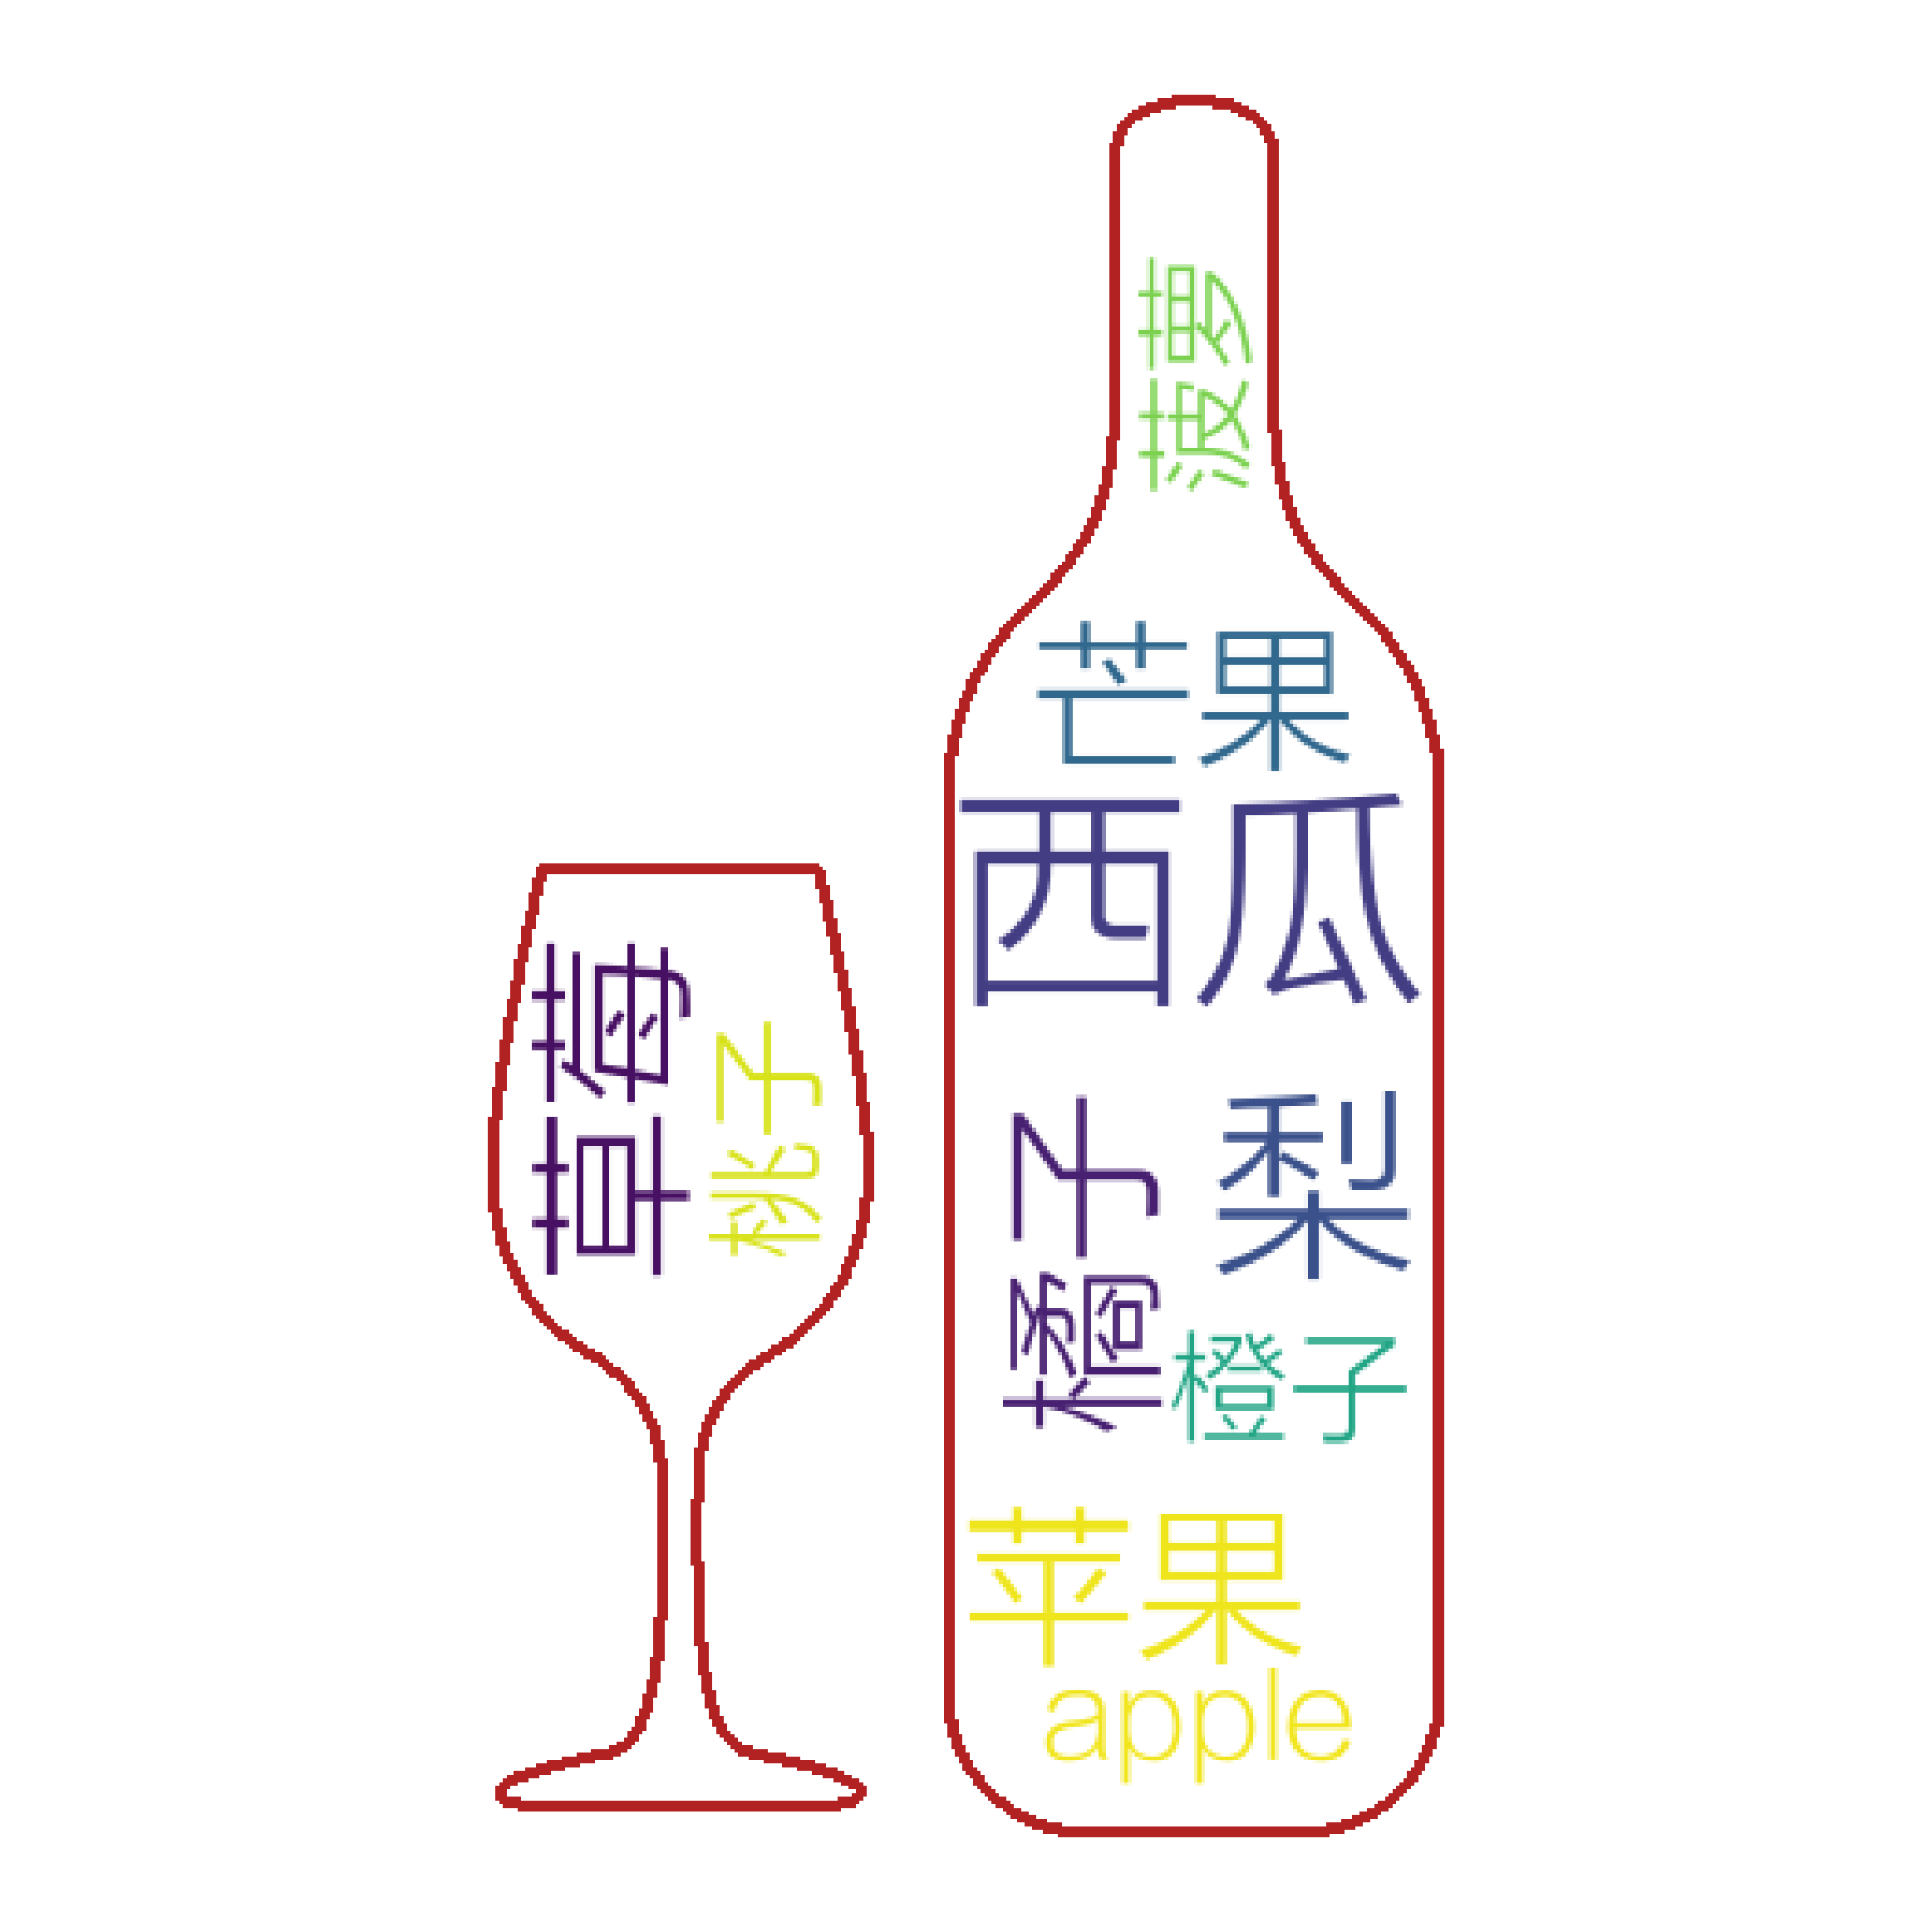

In [32]:
da = wd.set_index('关键词').T.to_dict('records')

# 词频展示，定义词频背景
wc_mask = np.array(Image.open('design/wine_mask.png'))

wc = wordcloud.WordCloud(
    # 设置字体格式
    font_path='design/buzz_cloud_font.ttf',
    # 设置背景图
    mask=wc_mask,
    # 最多显示词数
    max_words=200,
    # 字体最大值
    max_font_size=320,
    # 整体背景色
    background_color='White',
    # 词云的边框大小
    contour_width=2,
    # 词云的边框颜色
    contour_color='Firebrick')

# 从字典生成词云
wc.generate_from_frequencies(da[0])
# 从背景图建立颜色方案
image_colors = wordcloud.ImageColorGenerator(wc_mask)
# 显示词云
plt.figure(figsize=[10, 10], dpi=300)
plt.imshow(wc)
plt.axis('off')
plt.show()

## 4、折线图

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from matplotlib.font_manager import FontProperties

plt.rcParams['font.sans-serif'] = ['SimHei']  # win
plt.rcParams["font.family"] = 'Arial Unicode MS'  # mac
plt.rcParams['axes.unicode_minus'] = False

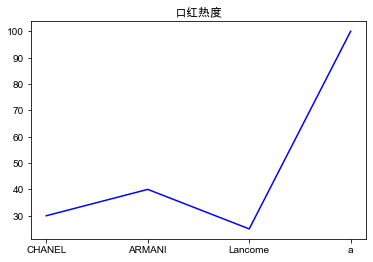

In [34]:
# 此处可以添加（删除数据），要保证格式和原数据相同
x = ['CHANEL', 'ARMANI', 'Lancome', 'a']
y = [30, 40, 25, 100]

plt.plot(x, y, color='blue')
plt.title("口红热度")
plt.show()

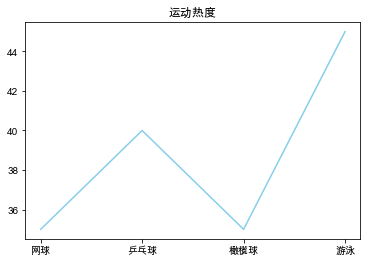

In [35]:
# 此处可以添加（删除数据），要保证格式和原数据相同
a = ['网球', '乒乓球', '橄榄球', '游泳']
b = [35, 40, 35, 45]

plt.plot(a, b, color='skyblue')
plt.title("运动热度")
plt.show()

## 5、直方图

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from matplotlib.font_manager import FontProperties

plt.rcParams['font.sans-serif'] = ['SimHei']  # win
plt.rcParams["font.family"] = 'Arial Unicode MS'  # mac
plt.rcParams['axes.unicode_minus'] = False


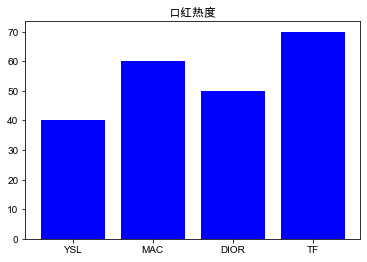

In [37]:
x = ['YSL', 'MAC', 'DIOR', 'TF']
y = [40, 60, 50, 70]

plt.bar(x, y, color='blue')
plt.title("口红热度")
plt.show()

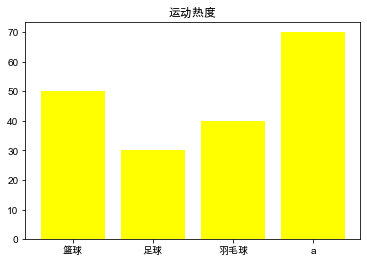

In [38]:
a = ['篮球', '足球', '羽毛球', 'a']
b = [50, 30, 40, 70]

plt.bar(a, b, color='yellow')
plt.title("运动热度")
plt.show()
